In [12]:
import sklearn


In [13]:
# from sklearn.metrics._scorer import _PredictScorer


In [14]:
import pandas as pd
import csv
import os
import numpy as np
# Reload the module to pick up changes
import importlib
import sys
if 'pycaret.survival_analysis.pycaret_wrapper.oop' in sys.modules:
    importlib.reload(sys.modules['pycaret.survival_analysis.pycaret_wrapper.oop'])
if 'pycaret.survival_analysis.pycaret_wrapper.metrics' in sys.modules:
    importlib.reload(sys.modules['pycaret.survival_analysis.pycaret_wrapper.metrics'])
if 'pycaret.survival_analysis.pycaret_wrapper.models' in sys.modules:
    importlib.reload(sys.modules['pycaret.survival_analysis.pycaret_wrapper.models'])
from pycaret.survival_analysis.pycaret_wrapper.oop import SurvivalExperiment
from pycaret.survival_analysis.pycaret_wrapper.oop import *
from pycaret.regression.oop import RegressionExperiment
import lifelines
from copy import deepcopy
exp1 = SurvivalExperiment()
# data_dir = '..\\csv\\'
# List the files in the current directory
files = os.listdir('./csv')
# Get the absolute path of the current directory
current_dir = os.getcwd()
# Create a DataFrame with the file names and their absolute paths
file_paths = pd.DataFrame({
    'file_name': files,
    'absolute_path': [os.path.join(current_dir, 'csv', file) for file in files]
}) 
df = pd.read_csv(file_paths['absolute_path'][0], index_col=0)
# df = pd.read_csv("../csv/SA/NKI_cleaned.csv", sep=',', encoding='utf-8')

features_to_drop = df.columns[16:]
df = df.drop(features_to_drop, axis=1)
for cols in df.columns:
    print(cols)
print("Modules reloaded successfully!")

ID
age
eventdeath
survival
timerecurrence
chemo
hormonal
amputation
histtype
diam
posnodes
grade
angioinv
lymphinfil
barcode
esr1
Modules reloaded successfully!


In [15]:
print("DataFrame columns before setup:", df.columns.tolist())
print("Target argument:", ['eventdeath', 'timerecurrence'])
print("First few rows:\n", df.head())

# Create a new experiment for debugging
exp1 = SurvivalExperiment()

# Try to manually inspect what happens during setup
print("\nBefore setup:")
print("exp1.train exists:", hasattr(exp1, 'train'))
print("exp1.X_train exists:", hasattr(exp1, 'X_train'))

# Run partial setup but catch the error
try:
    exp1.setup(data=deepcopy(df),
               target=['eventdeath', 'timerecurrence'],
               ignore_features=['Patient','ID', 'barcode'],
               keep_features=['timerecurrence'],
               fold=10,
               numeric_imputation='median',
               categorical_imputation='mode',
               imputation_type='simple',
               preprocess=True,
               normalize=False,
               n_jobs=1,
               verbose=6)
except Exception as e:
    print(f"Error during setup: {e}")
    print("Debug info:")
    print("exp1.train exists:", hasattr(exp1, 'train'))
    print("exp1.X_train exists:", hasattr(exp1, 'X_train'))
    print("exp1.dataset exists:", hasattr(exp1, 'dataset'))
    print("exp1.pipeline exists:", hasattr(exp1, 'pipeline'))
    print("exp1.idx exists:", hasattr(exp1, 'idx'))
    
    if hasattr(exp1, 'dataset'):
        print("exp1.dataset shape:", exp1.dataset.shape)
        print("exp1.dataset columns:", exp1.dataset.columns.tolist())
        print("exp1.dataset target_param:", exp1.target_param)
        
    if hasattr(exp1, 'idx'):
        print("exp1.idx:", exp1.idx)
        print("exp1.idx type:", type(exp1.idx))
        
    if hasattr(exp1, 'X_train'):
        print("exp1.X_train:", exp1.X_train)
        print("exp1.X_train type:", type(exp1.X_train))
        
    if hasattr(exp1, 'y_train'):
        print("exp1.y_train:", exp1.y_train)
        print("exp1.y_train type:", type(exp1.y_train))
        
    if hasattr(exp1, 'pipeline'):
        print("exp1.pipeline:", exp1.pipeline)
        print("exp1.pipeline steps:", exp1.pipeline.steps)
        
    # Try to call the transform method manually
    if hasattr(exp1, 'X_train') and hasattr(exp1, 'y_train') and hasattr(exp1, 'pipeline'):
        try:
            result = exp1.pipeline.transform(X=exp1.X_train, y=exp1.y_train, filter_train_only=False)
            print("Transform result:", result)
            print("Transform result type:", type(result))
        except Exception as te:
            print(f"Transform error: {te}")
    raise
else:
    print("Setup completed successfully.")
    print("exp1.train exists:", hasattr(exp1, 'train'))
    print("exp1.X_train exists:", hasattr(exp1, 'X_train'))
    print("exp1.dataset exists:", hasattr(exp1, 'dataset'))
    print("exp1.pipeline exists:", hasattr(exp1, 'pipeline'))
    print("exp1.idx exists:", hasattr(exp1, 'idx'))
    
    if hasattr(exp1, 'dataset'):
        print("exp1.dataset shape:", exp1.dataset.shape)
        print("exp1.dataset columns:", exp1.dataset.columns.tolist())
        print("exp1.dataset target_param:", exp1.target_param)
    
    if hasattr(exp1, 'idx'):
        print("exp1.idx:", exp1.idx)
        print("exp1.idx type:", type(exp1.idx))
    
    if hasattr(exp1, 'X_train'):
        print("exp1.X_train shape:", exp1.X_train.shape)
        print("exp1.X_train type:", type(exp1.X_train))
    
    if hasattr(exp1, 'y_train'):
        print("exp1.y_train shape:", exp1.y_train.shape)
        print("exp1.y_train type:", type(exp1.y_train))
    
    if hasattr(exp1, 'pipeline'):
        print("exp1.pipeline steps:", exp1.pipeline.steps)
        print("exp1.pipeline type:", type(exp1.pipeline))
        print("Pipeline steps:")
        for step_name, step in exp1.pipeline.steps:
            print(f"  {step_name}: {type(step)}")

DataFrame columns before setup: ['ID', 'age', 'eventdeath', 'survival', 'timerecurrence', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil', 'barcode', 'esr1']
Target argument: ['eventdeath', 'timerecurrence']
First few rows:
          ID  age  eventdeath   survival  timerecurrence  chemo  hormonal  \
Patient                                                                    
s122     18   43           0  14.817248       14.817248      0         0   
s123     19   48           0  14.261465       14.261465      0         0   
s124     20   38           0   6.644764        6.644764      0         0   
s125     21   50           0   7.748118        7.748118      0         1   
s126     22   38           0   6.436687        6.318960      0         0   

         amputation  histtype  diam  posnodes  grade  angioinv  lymphinfil  \
Patient                                                                      
s122              1         1    

,Description,Value
0,Session id,2493
1,Target,event
2,Target type,Survival Analysis
3,Data shape,"(272, 14)"
4,Train data shape,"(190, 14)"
5,Test data shape,"(82, 14)"
6,Ignore features,3
7,Numeric features,15
8,Keep features,1
9,Preprocess,True


Setup completed successfully.
exp1.train exists: True
exp1.X_train exists: True
exp1.dataset exists: True
exp1.pipeline exists: True
exp1.idx exists: True
exp1.dataset shape: (272, 14)
exp1.dataset columns: ['age', 'survival', 'time', 'chemo', 'hormonal', 'amputation', 'histtype', 'diam', 'posnodes', 'grade', 'angioinv', 'lymphinfil', 'esr1', 'event']
exp1.dataset target_param: event
exp1.idx: [RangeIndex(start=0, stop=190, step=1), RangeIndex(start=190, stop=272, step=1)]
exp1.idx type: <class 'list'>
exp1.X_train shape: (190, 13)
exp1.X_train type: <class 'pandas.core.frame.DataFrame'>
exp1.y_train shape: (190,)
exp1.y_train type: <class 'pandas.core.series.Series'>
exp1.pipeline steps: [('numerical_imputer', SimpleImputer(strategy='median')), ('categorical_imputer', SimpleImputer(strategy='most_frequent'))]
exp1.pipeline type: <class 'pycaret.survival_analysis.pycaret_wrapper.pipeline.Pipeline'>
Pipeline steps:
  numerical_imputer: <class 'pycaret.internal.preprocess.transformers_su

In [16]:
print("===========================================================")
print("available models:")
print("===========================================================")
models = exp1.models()
print(models)
print("===========================================================")
print("available metrics:")
print("===========================================================")
metrics = exp1.get_metrics()
print(metrics)
print("===========================================================")
print("metric IDs:")
print("===========================================================")
if hasattr(metrics, 'index'):
    for metric_id in metrics.index:
        print(f"  {metric_id}")

available models:
                                                 Name  \
ID                                                      
ipc_ridge                                   IPC Ridge   
coxph                                           CoxPH   
coxnet                                         CoxNet   
lasso-coxnet                              CoxNetLasso   
elastic-coxnet                            CoxNetLasso   
survival_tree                           Survival Tree   
rsf                              RandomSurvivalForest   
et_surv                            ExtraSurvivalTrees   
gb_surv                      GradientBoostingSurvival   
cwgb_surv       ComponentWiseGradientBoostingSurvival   
hloss_svm                        HingeLossSVMSurvival   
fastk_svm                       FastKernelSVMSurvival   
fast_svm                              FastSVMSurvival   
minlip_svm                          MinlipSVMSurvival   
naive_svm                            NaiveSVMSurvival   

            

IPC-Ridge model:


,C-IC,C-II,IBS,CAUC
Fold,,,,
0,0.1512,0.1796,nan,nan
1,0.0656,0.0503,nan,nan
2,0.0787,0.0524,nan,nan
3,0.2391,0.2415,nan,nan
4,0.1262,0.1258,nan,nan
5,0.1011,0.1664,nan,nan
6,0.1011,0.1040,nan,nan
7,0.1200,0.1189,nan,nan
8,0.3214,0.4417,nan,nan


IPC-Ridge model created successfully!


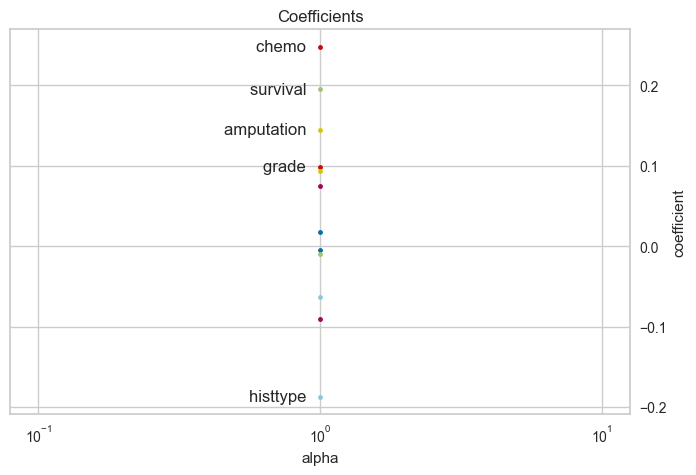

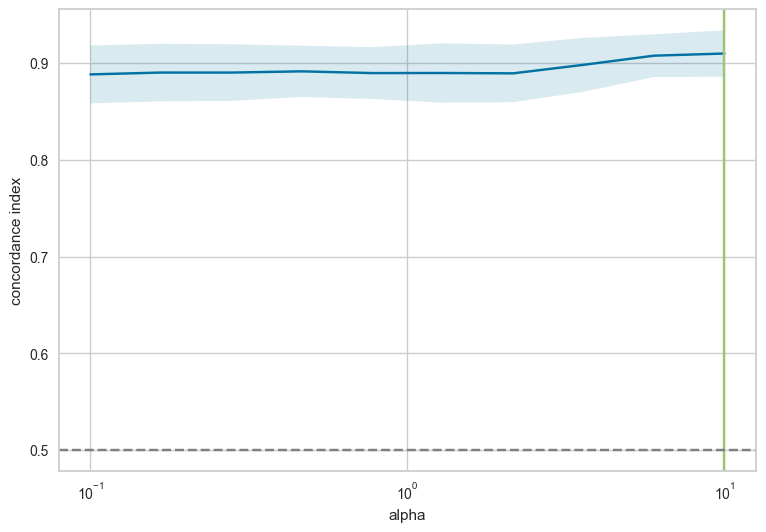

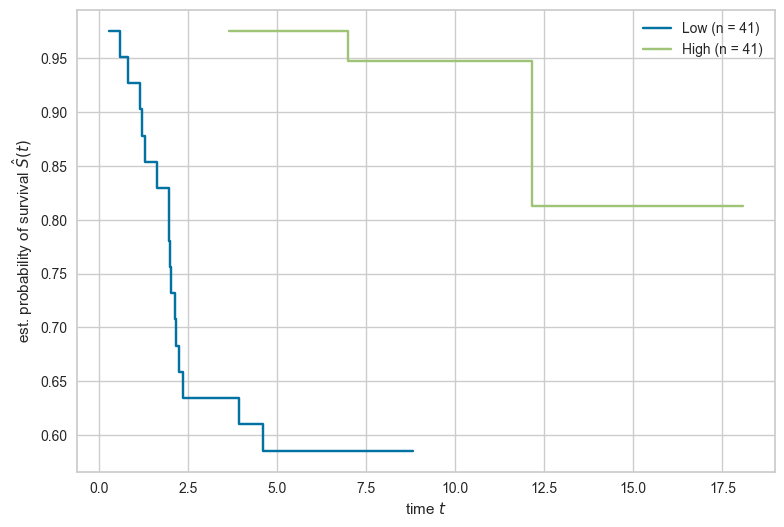

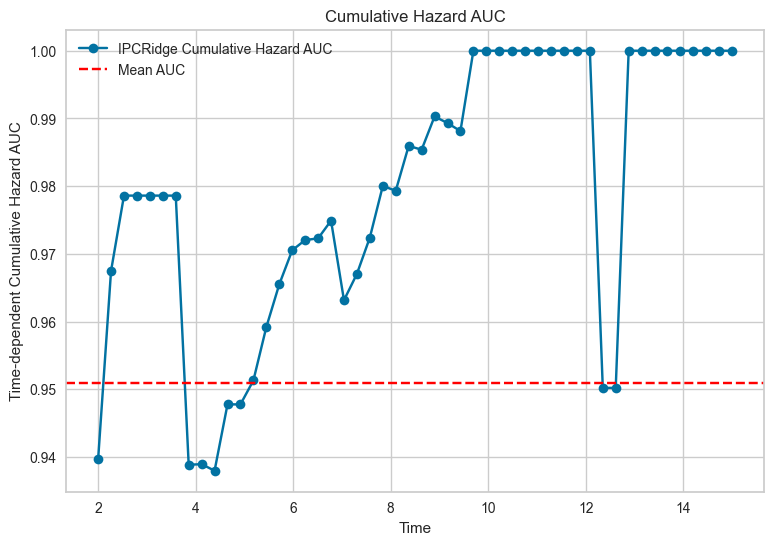

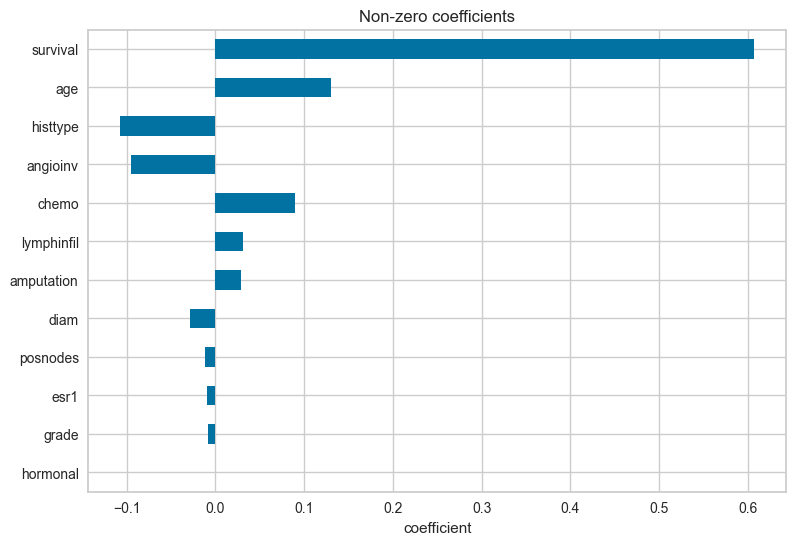

IPC-Ridge model plots generated successfully!


In [17]:
# IPC-Ridge model
print("===========================================================")
print("IPC-Ridge model:")
print("===========================================================")
ipc_ridge = exp1.create_model('ipc_ridge', fold=10, cross_validation=True)
print("IPC-Ridge model created successfully!")
exp1.plot_model(ipc_ridge, plot='plot_coefficients') 
exp1.plot_model(ipc_ridge, plot='plot_cindex')
exp1.plot_model(ipc_ridge, plot='plot_survival_curve')
exp1.plot_model(ipc_ridge, plot='plot_cauc') 
exp1.plot_model(ipc_ridge, plot='plot_nzcoefs')
print("IPC-Ridge model plots generated successfully!")

CoxPH model:


,C-IC,C-II,IBS,CAUC
Fold,,,,
0,0.8721,0.8588,0.0819,0.9593
1,0.9836,0.9873,0.0149,1.0000
2,0.9551,0.9710,0.0572,0.9717
3,0.8261,0.8223,0.1150,0.9369
4,0.9515,0.9518,0.0595,0.9980
5,0.9551,0.8712,0.0152,1.0000
6,0.9326,0.9292,0.0564,0.9719
7,0.9300,0.9337,0.0410,0.9658
8,0.8036,0.6520,0.7835,0.9039


CoxPH model created successfully!


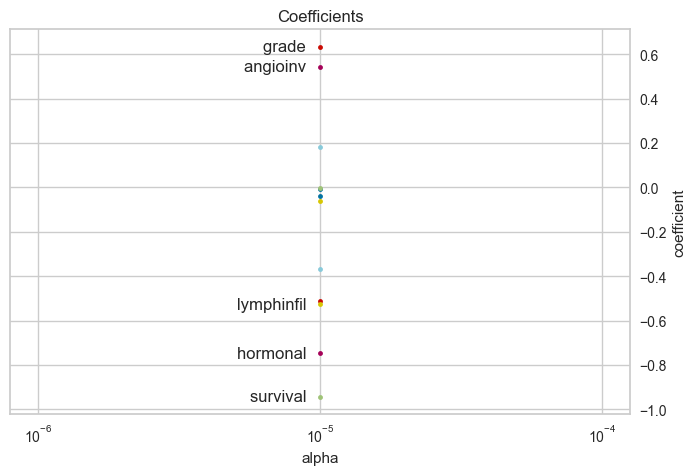

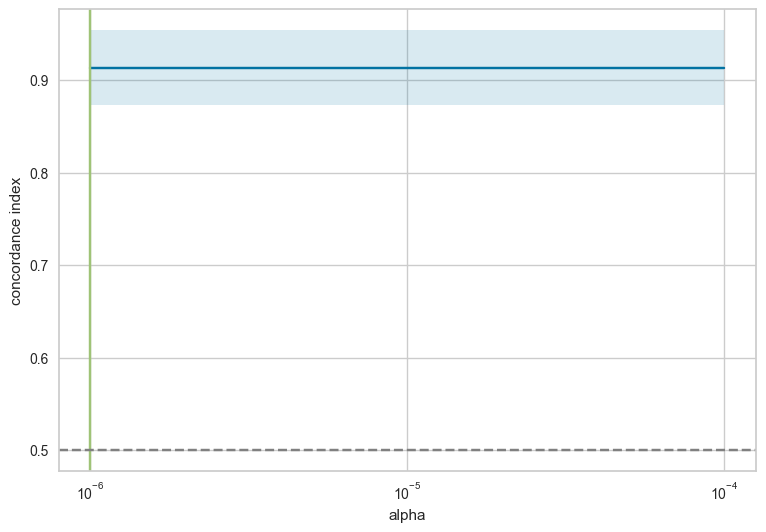

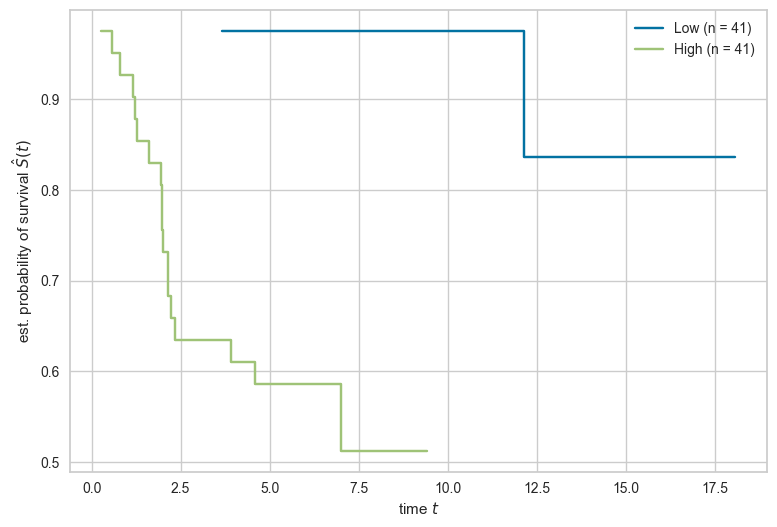

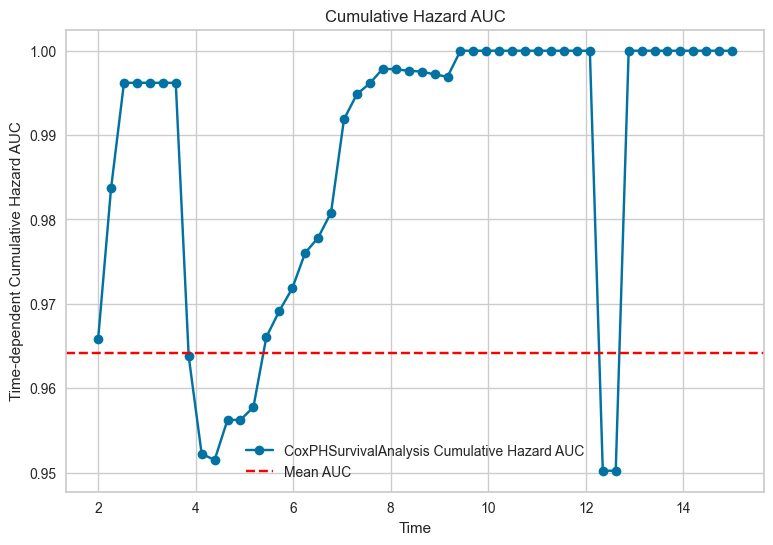

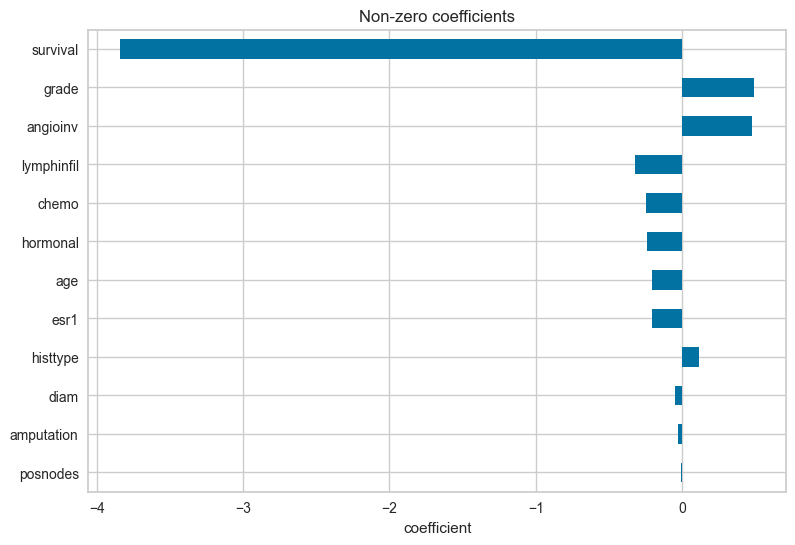

CoxPH model plots generated successfully!


In [18]:
# CoxPH model
print("===========================================================")
print("CoxPH model:")
print("===========================================================")
coxph = exp1.create_model('coxph', fold=10, cross_validation=True)
print("CoxPH model created successfully!")
exp1.plot_model(coxph, plot='plot_coefficients') 
exp1.plot_model(coxph, plot='plot_cindex')
exp1.plot_model(coxph, plot='plot_survival_curve')
exp1.plot_model(coxph, plot='plot_cauc') 
exp1.plot_model(coxph, plot='plot_nzcoefs')
print("CoxPH model plots generated successfully!")

CoxNet model:


,C-IC,C-II,IBS,CAUC
Fold,,,,
0,0.8605,0.8505,nan,nan
1,0.9836,0.9873,nan,nan
2,0.9438,0.9631,nan,nan
3,0.8261,0.8223,nan,nan
4,0.9515,0.9518,nan,nan
5,0.9551,0.8712,nan,nan
6,0.9326,0.9292,nan,nan
7,0.9300,0.9337,nan,nan
8,0.8036,0.6520,nan,nan


CoxNet model created successfully!


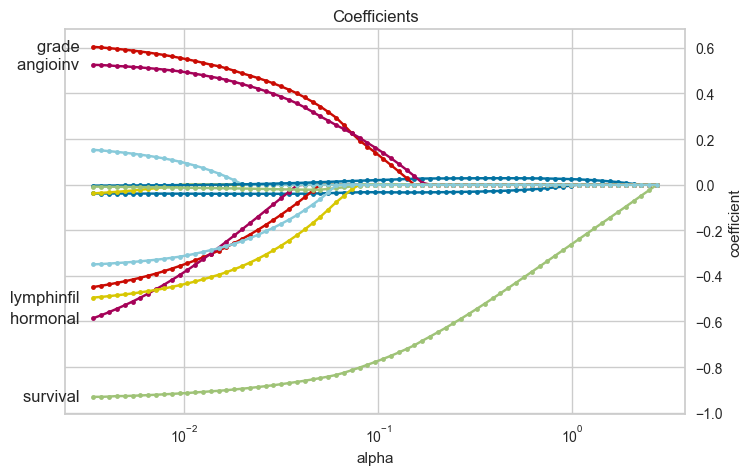

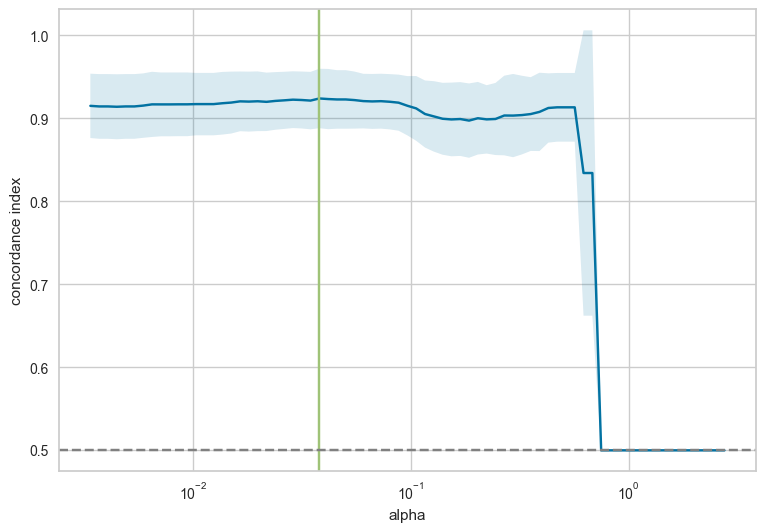

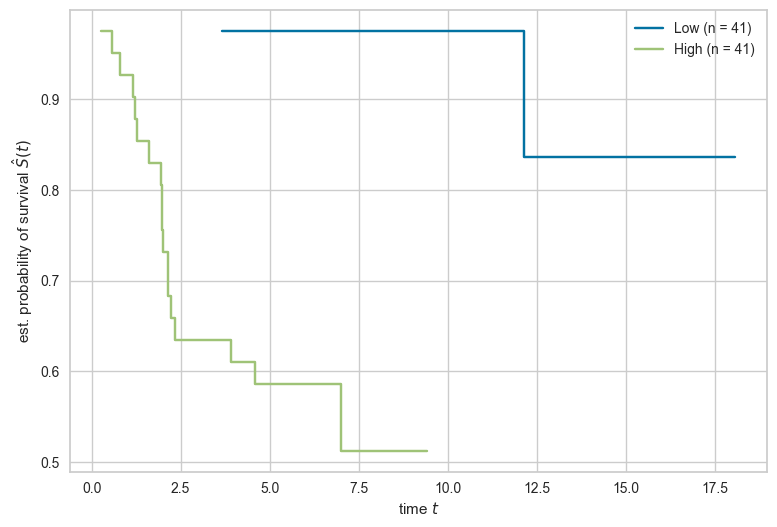

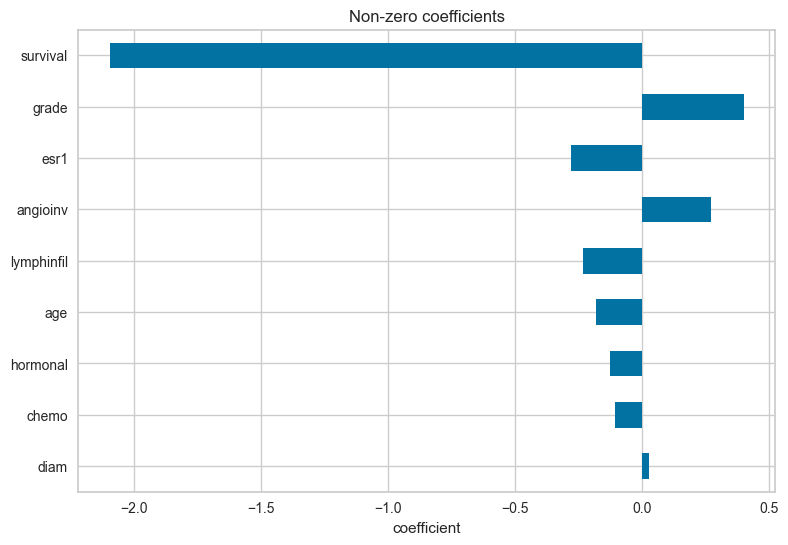

CoxNet model plots generated successfully!


In [19]:
# CoxNet model
print("===========================================================")
print("CoxNet model:")
print("===========================================================")
coxnet = exp1.create_model('coxnet', fold=10, cross_validation=True)
print("CoxNet model created successfully!")
exp1.plot_model(coxnet, plot='plot_coefficients') 
exp1.plot_model(coxnet, plot='plot_cindex')
exp1.plot_model(coxnet, plot='plot_survival_curve')
# exp1.plot_model(coxnet, plot='plot_cauc') 
exp1.plot_model(coxnet, plot='plot_nzcoefs')
print("CoxNet model plots generated successfully!")

Lasso-Coxnet model:


,C-IC,C-II,IBS,CAUC
Fold,,,,
0,0.8605,0.8505,nan,nan
1,0.9836,0.9873,nan,nan
2,0.9438,0.9631,nan,nan
3,0.8261,0.8223,nan,nan
4,0.9515,0.9518,nan,nan
5,0.9551,0.8712,nan,nan
6,0.9326,0.9292,nan,nan
7,0.9300,0.9337,nan,nan
8,0.8036,0.6520,nan,nan


Lasso-Coxnet model created successfully!



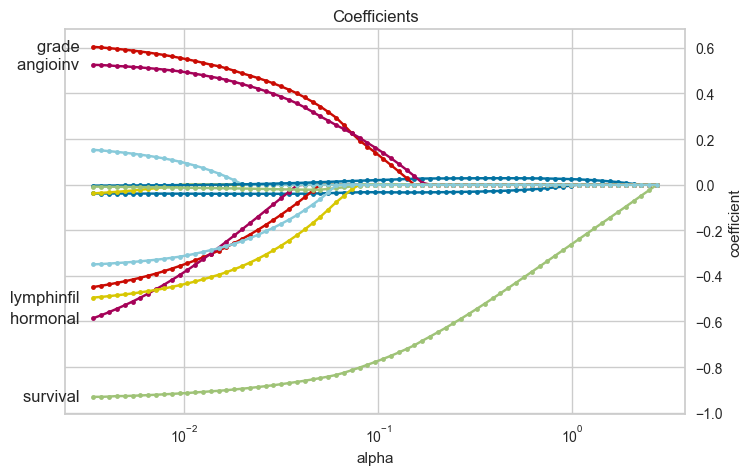

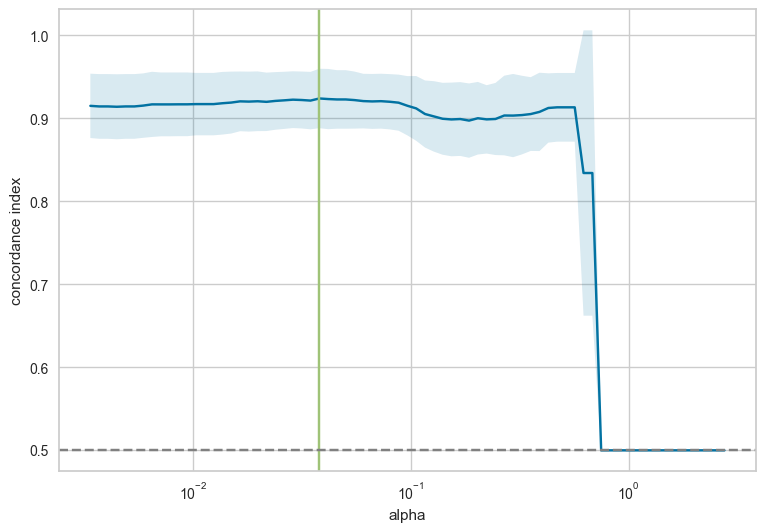

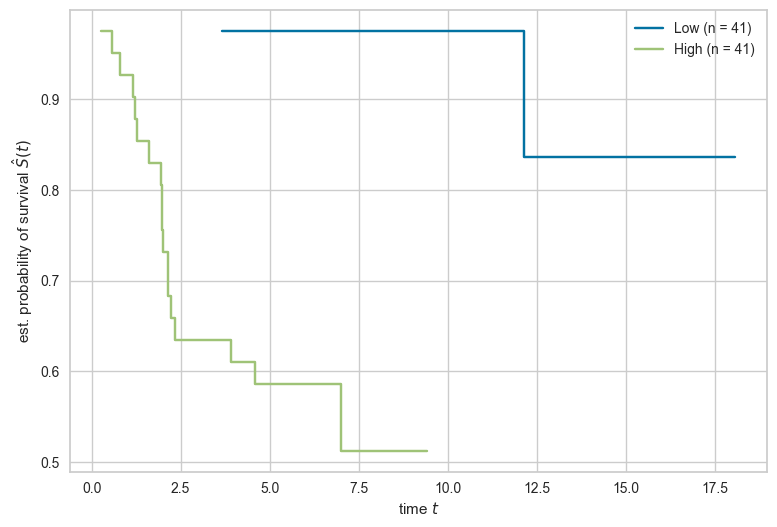

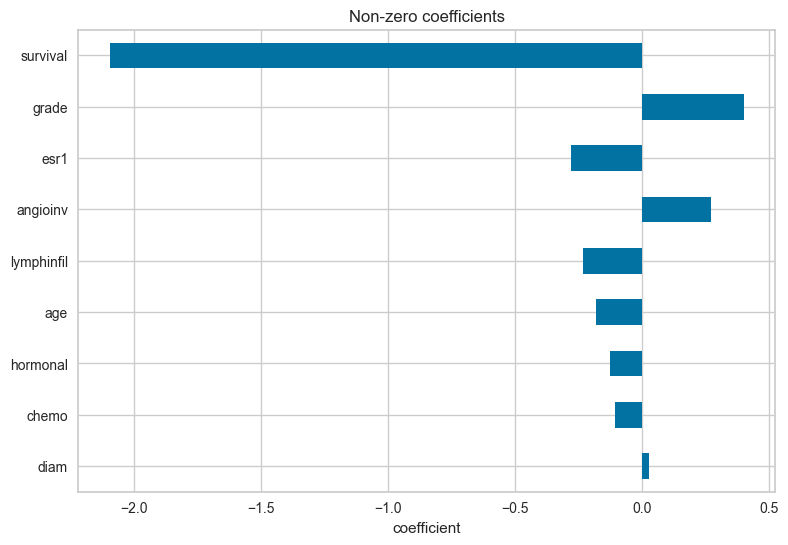

Lasso-Coxnet model plots generated successfully!


In [20]:
# Lasso-Coxnet model
print("===========================================================")
print("Lasso-Coxnet model:")
print("===========================================================")
lasso_coxnet = exp1.create_model('lasso-coxnet', fold=10, cross_validation=True)
print("Lasso-Coxnet model created successfully!")
exp1.plot_model(lasso_coxnet, plot='plot_coefficients') 
exp1.plot_model(lasso_coxnet, plot='plot_cindex')
exp1.plot_model(lasso_coxnet, plot='plot_survival_curve')
# exp1.plot_model(lasso_coxnet, plot='plot_cauc') 
exp1.plot_model(lasso_coxnet, plot='plot_nzcoefs')
print("Lasso-Coxnet model plots generated successfully!")

Elastic-Coxnet model:


,C-IC,C-II,IBS,CAUC
Fold,,,,
0,0.8605,0.8505,nan,nan
1,0.9836,0.9873,nan,nan
2,0.9438,0.9631,nan,nan
3,0.8261,0.8223,nan,nan
4,0.9515,0.9518,nan,nan
5,0.9551,0.8712,nan,nan
6,0.9326,0.9292,nan,nan
7,0.9300,0.9337,nan,nan
8,0.8036,0.6520,nan,nan


Elastic-Coxnet model created successfully!


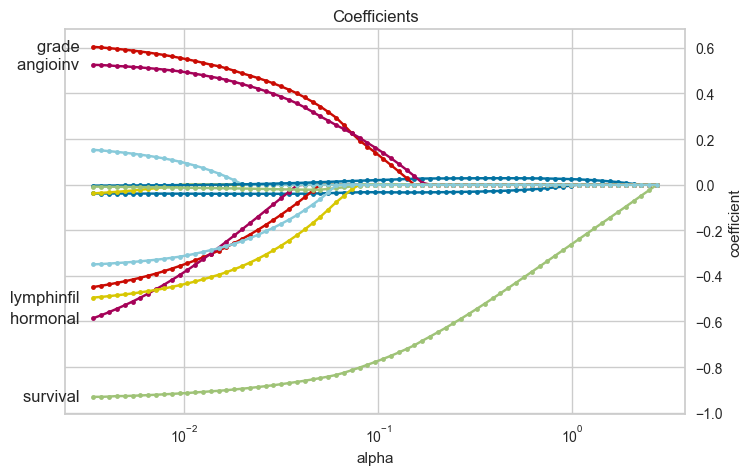

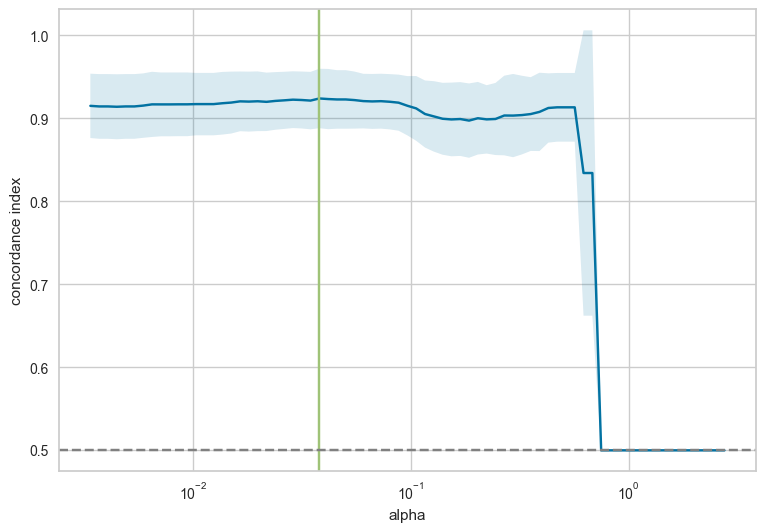

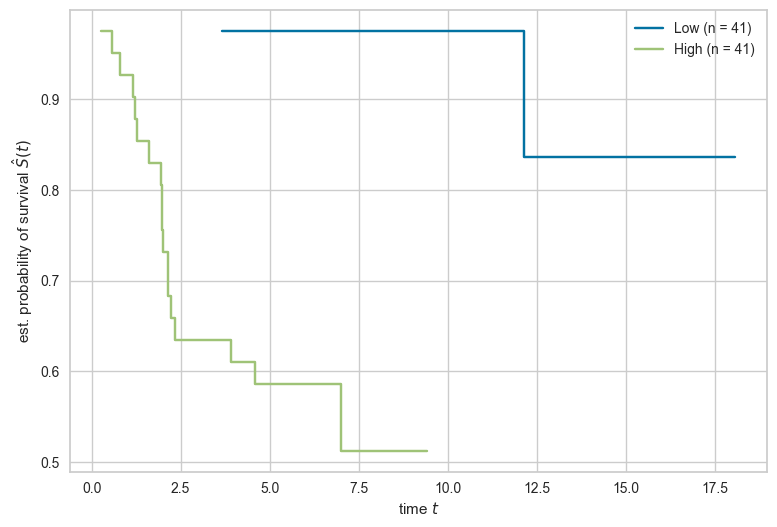

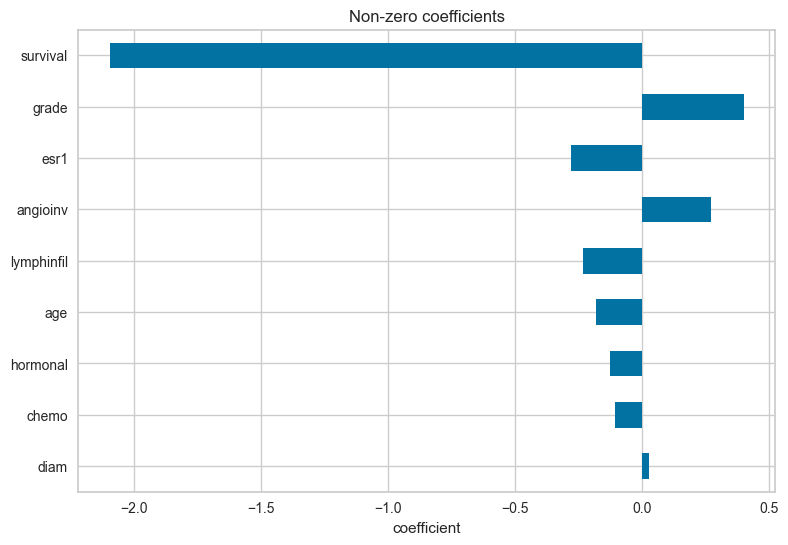

Elastic-Coxnet model plots generated successfully!


In [21]:
# Elastic-Coxnet model
print("===========================================================")
print("Elastic-Coxnet model:")
print("===========================================================")
elastic_coxnet = exp1.create_model('elastic-coxnet', fold=10, cross_validation=True)
print("Elastic-Coxnet model created successfully!")
exp1.plot_model(elastic_coxnet, plot='plot_coefficients') 
exp1.plot_model(elastic_coxnet, plot='plot_cindex')
exp1.plot_model(elastic_coxnet, plot='plot_survival_curve')
# exp1.plot_model(elastic_coxnet, plot='plot_cauc') 
exp1.plot_model(elastic_coxnet, plot='plot_nzcoefs')
print("Elastic-Coxnet model plots generated successfully!")

In [ ]:
print("===========================================================")
print("compare models:")
print("===========================================================")
# rsf                              RandomSurvivalForest   
# et_surv                            ExtraSurvivalTrees   
# gb_surv                      GradientBoostingSurvival   
# cwgb_surv       ComponentWiseGradientBoostingSurvival   
# hloss_svm                        HingeLossSVMSurvival   
# fastk_svm                       FastKernelSVMSurvival   
# fast_svm                              FastSVMSurvival   
# minlip_svm                          MinlipSVMSurvival   
# naive_svm                            NaiveSVMSurvival   
# models_ = exp1.compare_models(sort='C-II', errors='raise', n_select=3, exclude=['rsf', 'et_surv', 'gb_surv', 'cwgb_surv', 'hloss_svm', 'fastk_svm', 'fast_svm', 'minlip_svm', 'naive_svm'])
models_ = exp1.compare_models(sort='C-II', errors='raise', n_select=3)

compare models:


,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,01:33:49
Status,. . . . . . . . . . . . . . . . . .,Fitting 10 Folds
Estimator,. . . . . . . . . . . . . . . . . .,HingeLossSVMSurvival


,Model,C-IC,C-II,IBS,CAUC,TT (Sec)
coxph,CoxPH,0.9181,0.8949,0.1232,0.9708,0.0100
coxnet,CoxNet,0.9158,0.8933,nan,nan,0.0100
lasso-coxnet,CoxNetLasso,0.9158,0.8933,nan,nan,0.0100
elastic-coxnet,CoxNetLasso,0.9158,0.8933,nan,nan,0.0100
et_surv,ExtraSurvivalTrees,0.8965,0.8701,0.1101,nan,0.0500
cwgb_surv,ComponentWiseGradientBoostingSurvival,0.8789,0.8624,0.1306,0.9370,0.0300
rsf,RandomSurvivalForest,0.8829,0.8585,0.0886,nan,0.0700
gb_surv,GradientBoostingSurvival,0.8913,0.8378,0.0625,0.9607,0.0400
survival_tree,Survival Tree,0.8693,0.8093,0.0801,nan,0.0100
ipc_ridge,IPC Ridge,0.1304,0.1481,nan,nan,0.0000


Processing:   0%|          | 0/67 [00:00<?, ?it/s]